In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [2]:
df = pd.read_csv('lr_range_test_AM0-55c_4.csv', index_col=0)

In [3]:
df.head()

,iteration,kldloss,agedelta,lr
1,1,3928.796875,62.386402,0.000001
2,2,3894.812012,62.020245,0.000001
3,3,4727.229492,68.505379,0.000001
4,4,3930.250732,62.460987,0.000001
5,5,3801.263672,61.050282,0.000001


(0.0, 5000.0)

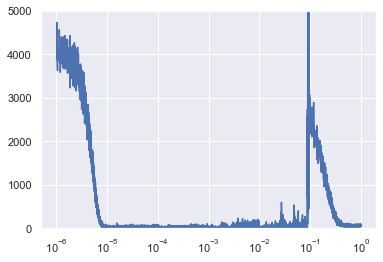

In [6]:
plt.figure()
plt.plot(df.lr, df.kldloss)
plt.xscale('log')
plt.ylim([0,5000])

In [7]:
df['change'] = df.kldloss
for i in range(df.shape[0]):
    if i == 0:
        df.change.iloc[0]= 0.0
    else:
        df.change.iloc[i] = df.kldloss.iloc[i] - df.kldloss.iloc[i-1]
df[['change_running','lr_running']] = df.rolling(window=10).mean()[['change','lr']]
df[['kld_running','lr_running']] = df.rolling(window=30).mean()[['kldloss','lr']]

/Users/aroibu_admin/agemapper/env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
df

,iteration,kldloss,agedelta,lr,change,change_running,lr_running,kld_running
1,1,3928.796875,62.386402,0.000001,0.000000,NaN,NaN,NaN
2,2,3894.812012,62.020245,0.000001,-33.984863,NaN,NaN,NaN
3,3,4727.229492,68.505379,0.000001,832.417480,NaN,NaN,NaN
4,4,3930.250732,62.460987,0.000001,-796.978760,NaN,NaN,NaN
5,5,3801.263672,61.050282,0.000001,-128.987061,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5995,5995,64.864182,6.887253,1.000000,22.130848,0.341364,0.987808,64.562117
5996,5996,54.603287,6.519354,1.000000,-10.260895,-2.088220,0.988649,64.894838
5997,5997,43.633064,5.606104,1.000000,-10.970222,-2.381767,0.989459,64.329128
5998,5998,60.396049,6.579511,1.000000,16.762985,-1.162015,0.990240,63.990011


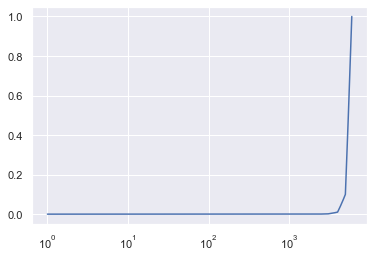

In [9]:
plt.plot(df.lr)
plt.xscale('log')

(-1000.0, 1000.0)

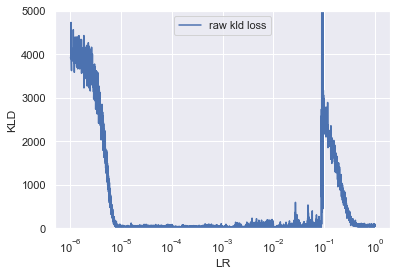

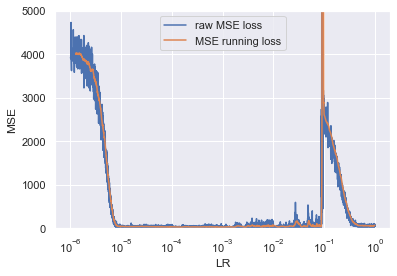

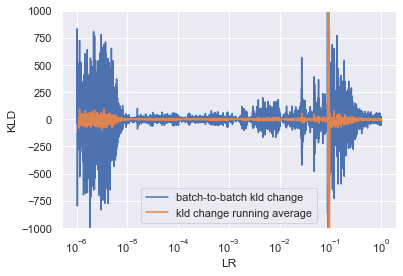

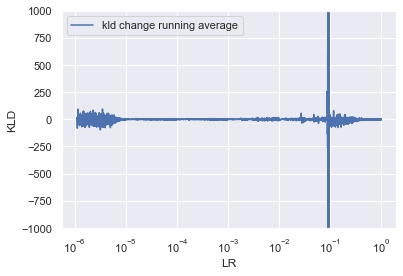

In [25]:
plt.figure()
plt.plot(df.lr, df.kldloss, label='raw kld loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('KLD')
plt.legend()
plt.ylim([0,5000])

plt.figure()
plt.plot(df.lr, df.kldloss, label='raw MSE loss')
plt.plot(df.lr, df.kld_running, label='MSE running loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('MSE')
plt.legend()
plt.ylim([0,5000])

plt.figure()
plt.plot(df.lr, df.change, label='batch-to-batch kld change')
plt.plot(df.lr, df.change_running, label='kld change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('KLD')
plt.ylim([-1000,1000])

plt.figure()
plt.plot(df.lr, df.change_running, label='kld change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('KLD')
plt.ylim([-1000,1000])

(5e-06, 5)

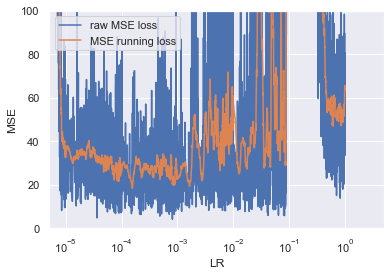

In [24]:
plt.figure()
plt.plot(df.lr, df.kldloss, label='raw MSE loss')
plt.plot(df.lr, df.kld_running, label='MSE running loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('MSE')
plt.legend()
plt.ylim([0,100])
plt.xlim([5e-6, 5])

In [15]:
df['age_change'] = df.agedelta
for i in range(df.shape[0]):
    if i == 0:
        df.age_change.iloc[0]= 0.0
    else:
        df.age_change.iloc[i] = df.agedelta.iloc[i] - df.agedelta.iloc[i-1]
df[['age_change_running','lr_running']] = df.rolling(window=10).mean()[['age_change','lr']]
df[['age_running','lr_running']] = df.rolling(window=30).mean()[['agedelta','lr']]

/Users/aroibu_admin/agemapper/env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [16]:
df

,iteration,kldloss,agedelta,lr,change,change_running,lr_running,kld_running,age_change,age_change_running,age_running
1,1,3928.796875,62.386402,0.000001,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN
2,2,3894.812012,62.020245,0.000001,-33.984863,NaN,NaN,NaN,-0.366158,NaN,NaN
3,3,4727.229492,68.505379,0.000001,832.417480,NaN,NaN,NaN,6.485134,NaN,NaN
4,4,3930.250732,62.460987,0.000001,-796.978760,NaN,NaN,NaN,-6.044392,NaN,NaN
5,5,3801.263672,61.050282,0.000001,-128.987061,NaN,NaN,NaN,-1.410706,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5995,5995,64.864182,6.887253,1.000000,22.130848,0.341364,0.987808,64.562117,1.795992,0.078610,6.868034
5996,5996,54.603287,6.519354,1.000000,-10.260895,-2.088220,0.988649,64.894838,-0.367899,-0.011078,6.899894
5997,5997,43.633064,5.606104,1.000000,-10.970222,-2.381767,0.989459,64.329128,-0.913249,-0.174167,6.859927
5998,5998,60.396049,6.579511,1.000000,16.762985,-1.162015,0.990240,63.990011,0.973407,-0.089900,6.857550


Text(0, 0.5, 'Age Delta')

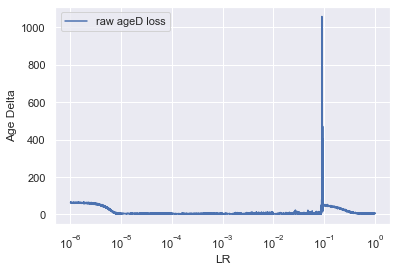

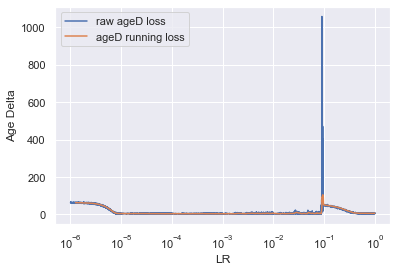

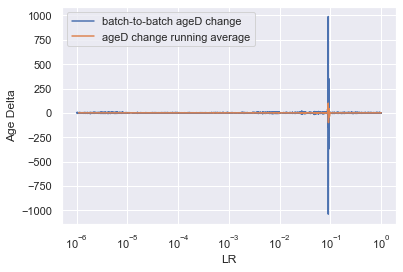

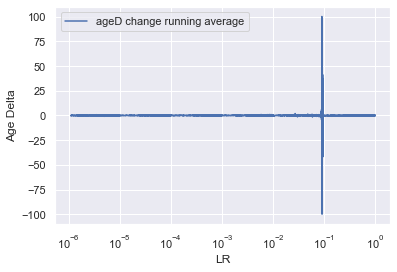

In [17]:
plt.figure()
plt.plot(df.lr, df.agedelta, label='raw ageD loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('Age Delta')
plt.legend()

plt.figure()
plt.plot(df.lr, df.agedelta, label='raw ageD loss')
plt.plot(df.lr, df.age_running, label='ageD running loss')
plt.xscale('log')
plt.xlabel('LR')
plt.ylabel('Age Delta')
plt.legend()

plt.figure()
plt.plot(df.lr, df.age_change, label='batch-to-batch ageD change')
plt.plot(df.lr, df.age_change_running, label='ageD change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('Age Delta')

plt.figure()
plt.plot(df.lr, df.age_change_running, label='ageD change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('KLD')
plt.ylabel('Age Delta')

(-10.0, 10.0)

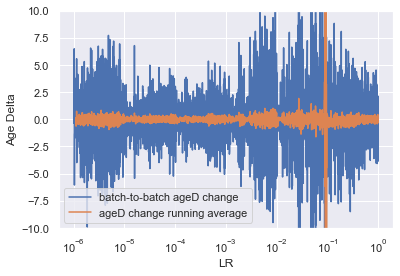

In [19]:
plt.figure()
plt.plot(df.lr, df.age_change, label='batch-to-batch ageD change')
plt.plot(df.lr, df.age_change_running, label='ageD change running average')
plt.xscale('log')
plt.legend()
plt.xlabel('LR')
plt.ylabel('Age Delta')
plt.ylim([-10, 10])